Generating word clouds and category analysis...

Top terms by category for all reviews:

Quality:
  great: 1389
  good: 1225
  perfect: 237
  excellent: 214
  solid: 143

Performance:
  fast: 257
  quick: 99
  slow: 65
  smooth: 45
  powerful: 40

Reliability:
  stable: 42
  broke: 39
  failed: 35
  broken: 21
  died: 19

Value:
  worth: 195
  cheap: 115
  expensive: 106
  reasonable: 51
  affordable: 23

Emotional:
  love: 467
  happy: 188
  impressed: 81
  pleased: 75
  disappointed: 50

Usability:
  easy: 649
  simple: 135
  difficult: 81
  convenient: 44
  awkward: 22


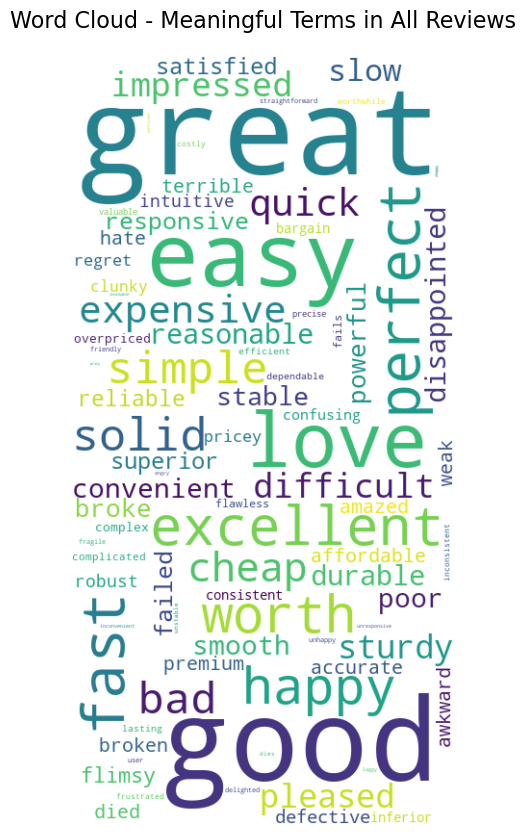


Top terms by category for positive reviews:

Quality:
  great: 1358
  good: 1171
  perfect: 234
  excellent: 214
  solid: 138

Performance:
  fast: 229
  quick: 91
  slow: 56
  smooth: 42
  powerful: 38

Reliability:
  stable: 40
  failed: 26
  broke: 22
  broken: 17
  died: 11

Value:
  worth: 183
  expensive: 97
  cheap: 92
  reasonable: 42
  affordable: 23

Emotional:
  love: 456
  happy: 181
  impressed: 81
  pleased: 72
  disappointed: 41

Usability:
  easy: 625
  simple: 128
  difficult: 68
  convenient: 40
  awkward: 19


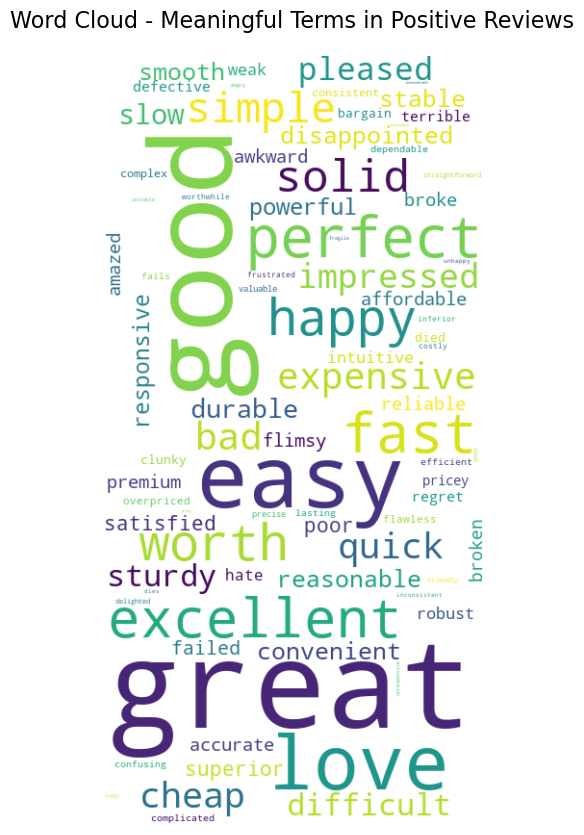


Top terms by category for negative reviews:

Quality:
  good: 46
  bad: 29
  great: 28
  cheap: 16
  poor: 16

Performance:
  fast: 16
  slow: 8
  quick: 6
  weak: 4
  powerful: 2

Reliability:
  broke: 14
  failed: 8
  died: 8
  broken: 4
  stable: 2

Value:
  cheap: 16
  worth: 12
  expensive: 6
  reasonable: 4
  pricey: 2

Emotional:
  love: 11
  disappointed: 9
  happy: 7
  hate: 5
  pleased: 3

Usability:
  easy: 20
  difficult: 13
  simple: 6
  confusing: 5
  awkward: 3


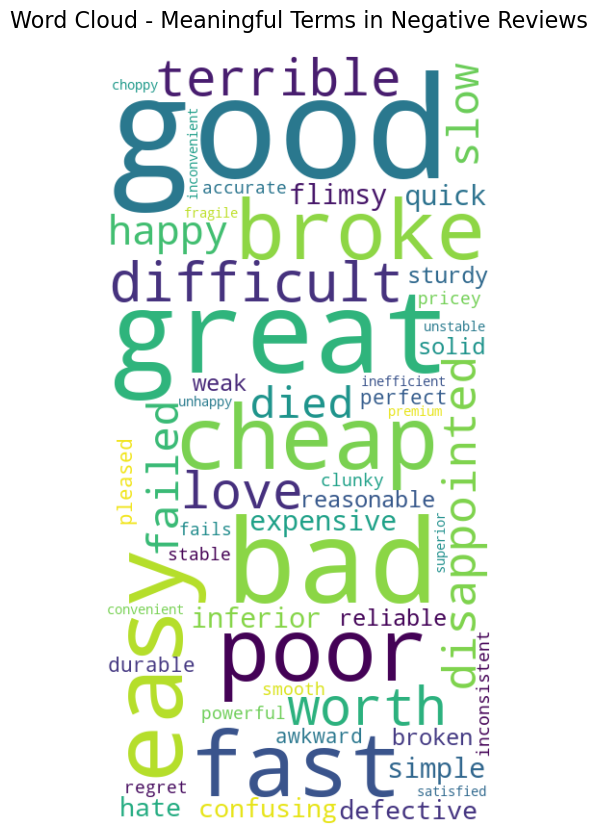

In [13]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from collections import Counter

def create_focused_wordcloud(input_file, sentiment=None):
    """
    Create a word cloud focusing only on meaningful descriptive terms using a whitelist approach.
    
    Parameters:
    input_file (str): Path to the CSV file
    sentiment (str): Optional - 'positive' or 'negative' to filter by sentiment
    """
    # Read the dataset
    df = pd.read_csv(input_file)
    
    # Filter by sentiment if specified
    if sentiment:
        df = df[df['sentiment'] == sentiment]
    
    # Define whitelisted terms by category
    whitelist = {
        'quality': {
            'excellent', 'poor', 'terrible', 'great', 'good', 'bad', 'superior',
            'inferior', 'perfect', 'flawless', 'defective', 'solid', 'weak',
            'premium', 'cheap', 'reliable', 'unreliable', 'durable', 'flimsy',
            'robust', 'sturdy', 'fragile'
        },
        'performance': {
            'fast', 'slow', 'quick', 'laggy', 'responsive', 'unresponsive',
            'smooth', 'choppy', 'efficient', 'inefficient', 'powerful',
            'weak', 'consistent', 'inconsistent', 'accurate', 'inaccurate',
            'precise', 'imprecise'
        },
        'reliability': {
            'broke', 'broken', 'lasting', 'failed', 'fails', 'stable',
            'unstable', 'consistent', 'inconsistent', 'dependable',
            'undependable', 'trustworthy', 'unreliable', 'dies', 'died'
        },
        'value': {
            'expensive', 'overpriced', 'cheap', 'reasonable', 'worth',
            'worthwhile', 'bargain', 'costly', 'affordable', 'unaffordable',
            'valuable', 'invaluable', 'pricey', 'pricy'
        },
        'emotional': {
            'love', 'hate', 'disappointed', 'satisfied', 'happy', 'unhappy',
            'pleased', 'displeased', 'amazed', 'frustrated', 'angry',
            'delighted', 'regret', 'impressed', 'unimpressed'
        },
        'usability': {
            'easy', 'difficult', 'simple', 'complicated', 'intuitive',
            'confusing', 'straightforward', 'complex', 'convenient',
            'inconvenient', 'user-friendly', 'clunky', 'awkward'
        }
    }
    
    # Combine all whitelisted terms
    all_whitelist_terms = set().union(*whitelist.values())
    
    def extract_whitelisted_words(text):
        """Extract only whitelisted words from text."""
        words = text.lower().split()
        return ' '.join(word for word in words if word in all_whitelist_terms)
    
    # Process all reviews and combine whitelisted words
    text = ' '.join(df['review_text'].dropna().astype(str).apply(extract_whitelisted_words))
    
    # Create word frequencies
    word_freq = Counter(text.split())
    
    # Print top terms by category
    print(f"\nTop terms by category for {sentiment if sentiment else 'all'} reviews:")
    for category, terms in whitelist.items():
        category_words = {word: count for word, count in word_freq.items() if word in terms}
        if category_words:
            print(f"\n{category.title()}:")
            sorted_words = sorted(category_words.items(), key=lambda x: x[1], reverse=True)
            for word, count in sorted_words[:5]:  # Top 5 words in each category
                print(f"  {word}: {count}")
    
    # Create and configure the WordCloud object
    wordcloud = WordCloud(
        height=800,
        background_color='white',
        max_words=100,
        collocations=False,
        contour_width=3,
        contour_color='steelblue'
    )
    
    # Generate word cloud
    wordcloud = wordcloud.generate(text)
    
    # Create the plot
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    # Add title based on sentiment
    title = "Word Cloud - Meaningful Terms in "
    title += f"{sentiment.capitalize()} Reviews" if sentiment else "All Reviews"
    plt.title(title, fontsize=16, pad=20)
    
    plt.show()


input_file = "../data/processed/final_sentiment_analysis_data.csv"

# Generate word clouds and print category analysis
print("Generating word clouds and category analysis...")

# All reviews
create_focused_wordcloud(input_file)

# Positive reviews only
create_focused_wordcloud(input_file, sentiment='positive')

# Negative reviews only
create_focused_wordcloud(input_file, sentiment='negative')

Key Insights:

1. Overall Sentiment Words
- Most common positive descriptors: "great" (1389) and "good" (1225) dominate
- "Love" appears frequently (467 times), suggesting strong positive emotional responses
- "Easy" is very common (649 times), indicating usability is a major factor

1. Quality vs Performance
- Quality terms are used much more frequently than performance terms
- "Great" (1389) vs "Fast" (257) shows people comment on general quality more than specific performance
- "Perfect" (237) and "Excellent" (214) suggest many highly satisfied customers

1. Reliability Issues
- Relatively low counts for reliability terms
- Only 42 mentions of "stable"
- Similar low counts for problems: "broke" (39), "failed" (35), "broken" (21)
- This might suggest reliability isn't a major concern

1. Value Propositions
- "Worth" (195) is the most common value term
- Balance between "cheap" (115) and "expensive" (106)
- Fewer mentions of "affordable" (23) might indicate price isn't the primary focus

1. User Experience
- Strong emphasis on ease of use: "easy" (649)
- "Simple" (135) reinforces the usability focus
- Relatively few negative usability terms: "difficult" (81), "awkward" (22)

These numbers suggest that:
1. Most reviews focus on general quality and ease of use
2. Strong emotional responses are common (especially positive ones)
3. Performance and reliability issues aren't frequently mentioned
4. Price/value discussions are present but not dominant

In [15]:
import pandas as pd
from collections import Counter
from tabulate import tabulate

def compare_sentiment_terms(input_file):
    """
    Compare term frequencies between positive and negative reviews.
    
    Parameters:
    input_file (str): Path to the CSV file
    """
    # Read the dataset
    df = pd.read_csv(input_file)
    
    # Define categories and their terms
    categories = {
        'Quality': {
            'excellent', 'poor', 'terrible', 'great', 'good', 'bad', 'superior',
            'inferior', 'perfect', 'flawless', 'defective', 'solid', 'weak',
            'premium', 'cheap', 'reliable', 'unreliable', 'durable', 'flimsy',
            'robust', 'sturdy', 'fragile'
        },
        'Performance': {
            'fast', 'slow', 'quick', 'laggy', 'responsive', 'unresponsive',
            'smooth', 'choppy', 'efficient', 'inefficient', 'powerful',
            'weak', 'consistent', 'inconsistent', 'accurate', 'inaccurate'
        },
        'Reliability': {
            'broke', 'broken', 'lasting', 'failed', 'fails', 'stable',
            'unstable', 'consistent', 'inconsistent', 'dependable',
            'undependable', 'trustworthy', 'unreliable', 'dies', 'died'
        },
        'Value': {
            'expensive', 'overpriced', 'cheap', 'reasonable', 'worth',
            'worthwhile', 'bargain', 'costly', 'affordable', 'unaffordable',
            'valuable', 'invaluable', 'pricey', 'pricy'
        },
        'Emotional': {
            'love', 'hate', 'disappointed', 'satisfied', 'happy', 'unhappy',
            'pleased', 'displeased', 'amazed', 'frustrated', 'angry',
            'delighted', 'regret', 'impressed', 'unimpressed'
        },
        'Usability': {
            'easy', 'difficult', 'simple', 'complicated', 'intuitive',
            'confusing', 'straightforward', 'complex', 'convenient',
            'inconvenient', 'user-friendly', 'clunky', 'awkward'
        }
    }
    
    # Get word frequencies for positive and negative reviews
    pos_reviews = df[df['sentiment'] == 'positive']['review_text'].str.lower()
    neg_reviews = df[df['sentiment'] == 'negative']['review_text'].str.lower()
    
    pos_words = ' '.join(pos_reviews.dropna()).split()
    neg_words = ' '.join(neg_reviews.dropna()).split()
    
    pos_freq = Counter(pos_words)
    neg_freq = Counter(neg_words)
    
    # Calculate total words in each sentiment
    total_pos = len(pos_words)
    total_neg = len(neg_words)
    
    # Prepare comparison data
    comparison_data = []
    
    print("\nComparison of Positive vs Negative Reviews\n")
    print(f"Total words in positive reviews: {total_pos:,}")
    print(f"Total words in negative reviews: {total_neg:,}\n")
    
    for category, terms in categories.items():
        print(f"\n{category} Terms:")
        print("-" * 80)
        print(f"{'Term':<15} {'Positive':<12} {'Negative':<12} {'Pos %':<10} {'Neg %':<10} {'Ratio +/-'}")
        print("-" * 80)
        
        for term in terms:
            pos_count = pos_freq[term]
            neg_count = neg_freq[term]
            
            if pos_count + neg_count > 0:  # Only show terms that appear
                pos_pct = (pos_count / total_pos) * 10000  # Per 10,000 words
                neg_pct = (neg_count / total_neg) * 10000  # Per 10,000 words
                
                # Calculate ratio (handle division by zero)
                if neg_count == 0:
                    ratio = float('inf')
                elif pos_count == 0:
                    ratio = 0
                else:
                    ratio = (pos_count / total_pos) / (neg_count / total_neg)
                
                if pos_count + neg_count >= 10:  # Only show terms with sufficient frequency
                    print(f"{term:<15} {pos_count:<12} {neg_count:<12} {pos_pct:>7.2f} {neg_pct:>9.2f} {ratio:>10.2f}")

input_file = "../data/processed/final_sentiment_analysis_data.csv"
compare_sentiment_terms(input_file)


Comparison of Positive vs Negative Reviews

Total words in positive reviews: 424,092
Total words in negative reviews: 34,781


Quality Terms:
--------------------------------------------------------------------------------
Term            Positive     Negative     Pos %      Neg %      Ratio +/-
--------------------------------------------------------------------------------
great           1358         28             32.02      8.05       3.98
durable         48           3               1.13      0.86       1.31
superior        30           1               0.71      0.29       2.46
terrible        13           11              0.31      3.16       0.10
cheap           92           16              2.17      4.60       0.47
poor            29           16              0.68      4.60       0.15
reliable        23           4               0.54      1.15       0.47
weak            16           4               0.38      1.15       0.33
perfect         234          3               5.52    

In [18]:
import pandas as pd
import numpy as np

def analyze_keyword_products(file_path, keyword, min_reviews=3):  # Lowered minimum reviews threshold
    """
    Analyze products based on the frequency of a specific keyword in their reviews.
    
    Parameters:
    file_path (str): Path to the CSV file containing review data
    keyword (str): Keyword to search for in reviews
    min_reviews (int): Minimum number of keyword mentions required for inclusion
    
    Returns:
    tuple: (product_summary, category_summary, brand_summary) DataFrames
    """
    # Read the dataset
    df = pd.read_csv(file_path)
    
    # Remove products with 'Untitled' in their names
    df = df[~df['title'].str.contains('Untitled', case=False, na=False)]
    
    # Print total number of reviews before filtering
    total_reviews = len(df)
    
    # Create mask for reviews containing the keyword
    # Using str.contains with word boundaries
    keyword_mask = df['review_text'].str.lower().str.contains(fr'\b{keyword.lower()}\b', na=False)
    keyword_reviews = df[keyword_mask].copy()
    
    # Print diagnostic information
    print(f"\nDiagnostic Information for '{keyword}':")
    print(f"Total reviews in dataset: {total_reviews}")
    print(f"Reviews containing '{keyword}': {len(keyword_reviews)}")
    
    # If no reviews found with the keyword, return early
    if len(keyword_reviews) == 0:
        print(f"No reviews found containing the word '{keyword}'")
        return None, None, None
    
    # Group by product and calculate metrics
    product_summary = keyword_reviews.groupby(['asin', 'title', 'brand', 'main_category']).agg({
        'review_text': 'count',  # Count of keyword reviews
        'overall': ['count', 'mean'],  # Total reviews and average rating
    }).reset_index()
    
    # Flatten column names
    product_summary.columns = ['asin', 'title', 'brand', 'main_category', 
                             'keyword_review_count', 'total_reviews', 'avg_rating']
    
    # Get total reviews for each product from original dataset
    total_product_reviews = df.groupby('asin')['review_text'].count()
    product_summary['all_reviews'] = product_summary['asin'].map(total_product_reviews)
    
    # Calculate percentage of reviews containing keyword
    product_summary['keyword_percentage'] = (product_summary['keyword_review_count'] / 
                                           product_summary['all_reviews'] * 100)
    
    # Sort by number of keyword reviews
    product_summary = product_summary.sort_values('keyword_review_count', ascending=False)
    
    # Filter for products with minimum required keyword reviews
    product_summary = product_summary[product_summary['keyword_review_count'] >= min_reviews]
    
    # Print diagnostic information
    print(f"Products with {min_reviews}+ mentions: {len(product_summary)}")
    
    # Replace NaN values in brand with "Unknown"
    product_summary['brand'] = product_summary['brand'].fillna('Unknown')
    
    # Only proceed with summaries if we have products meeting the criteria
    if len(product_summary) > 0:
        # Category analysis
        category_summary = product_summary.groupby('main_category').agg({
            'keyword_review_count': 'sum',
            'asin': 'count'
        }).sort_values('keyword_review_count', ascending=False)
        
        category_summary.columns = ['Total Keyword Reviews', 'Number of Products']
        
        # Brand analysis (excluding unknown brands)
        brand_summary = product_summary[product_summary['brand'] != 'Unknown'].groupby('brand').agg({
            'keyword_review_count': 'sum',
            'asin': 'count'
        }).sort_values('keyword_review_count', ascending=False)
        
        brand_summary.columns = ['Total Keyword Reviews', 'Number of Products']
        
        return product_summary, category_summary, brand_summary
    else:
        print(f"No products found with {min_reviews}+ mentions of '{keyword}'")
        return None, None, None

def print_keyword_analysis(keyword, product_summary, category_summary, brand_summary):
    """
    Print formatted analysis results.
    """
    if product_summary is None:
        return
        
    print(f"\nTop Products Frequently Described as '{keyword}':")
    print("-" * 120)
    print(f"{'Title':<60} {'Brand':<15} {'Category':<15} {f'{keyword} Reviews':<12} {'%':<10} {'Avg Rating'}")
    print("-" * 120)
    
    for _, row in product_summary.head(20).iterrows():
        title = row['title'][:57] + '...' if len(str(row['title'])) > 57 else str(row['title'])
        print(f"{title:<60} {str(row['brand'])[:14]:<15} "
              f"{str(row['main_category'])[:14]:<15} {row['keyword_review_count']:<12} "
              f"{row['keyword_percentage']:>6.1f}% {row['avg_rating']:>10.1f}")
    
    if len(category_summary) > 0:
        print(f"\nCategory Distribution of Products Described as '{keyword}':")
        print("-" * 50)
        print(category_summary)
    
    if len(brand_summary) > 0:
        print(f"\nTop Brands by '{keyword}' Reviews:")
        print("-" * 50)
        print(brand_summary.head(10))

# Example usage
file_path = "../data/processed/final_sentiment_analysis_data.csv"

# Test with multiple keywords
keywords = ['great', 'excellent', 'terrible', 'poor']
for keyword in keywords:
    print(f"\n{'='*40} Analysis for '{keyword}' {'='*40}")
    results = analyze_keyword_products(file_path, keyword, min_reviews=3)  # Lowered threshold
    if results[0] is not None:
        print_keyword_analysis(keyword, *results)


======================================== Analysis for 'great' ========================================

Diagnostic Information for 'great':
Total reviews in dataset: 3128
Reviews containing 'great': 929
Products with 3+ mentions: 53

Top Products Frequently Described as 'great':
------------------------------------------------------------------------------------------------------------------------
Title                                                        Brand           Category        great Reviews %          Avg Rating
------------------------------------------------------------------------------------------------------------------------
iPad Air Keyboard Case, New Trent Airbender Pro Detachabl... New Trent       Computers       12             54.5%        4.8
Linksys WRT AC1900 Dual-Band+ Wi-Fi Wireless Router with ... Linksys         Computers       11             57.9%        4.2
Samsung 32GB up to 48MB/s EVO Class 10 Micro SDHC Card wi... Samsung         Computers       9    

[nltk_data] Downloading package punkt to /Users/yizu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/yizu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yizu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


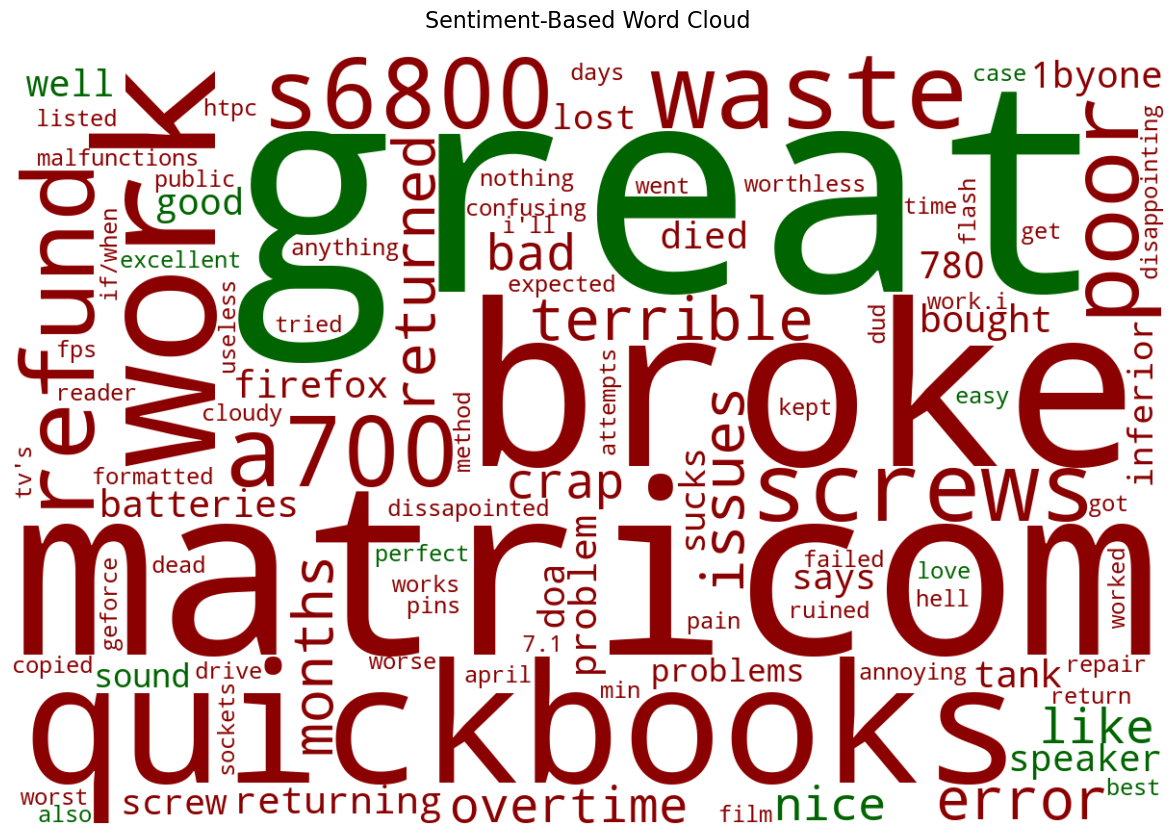

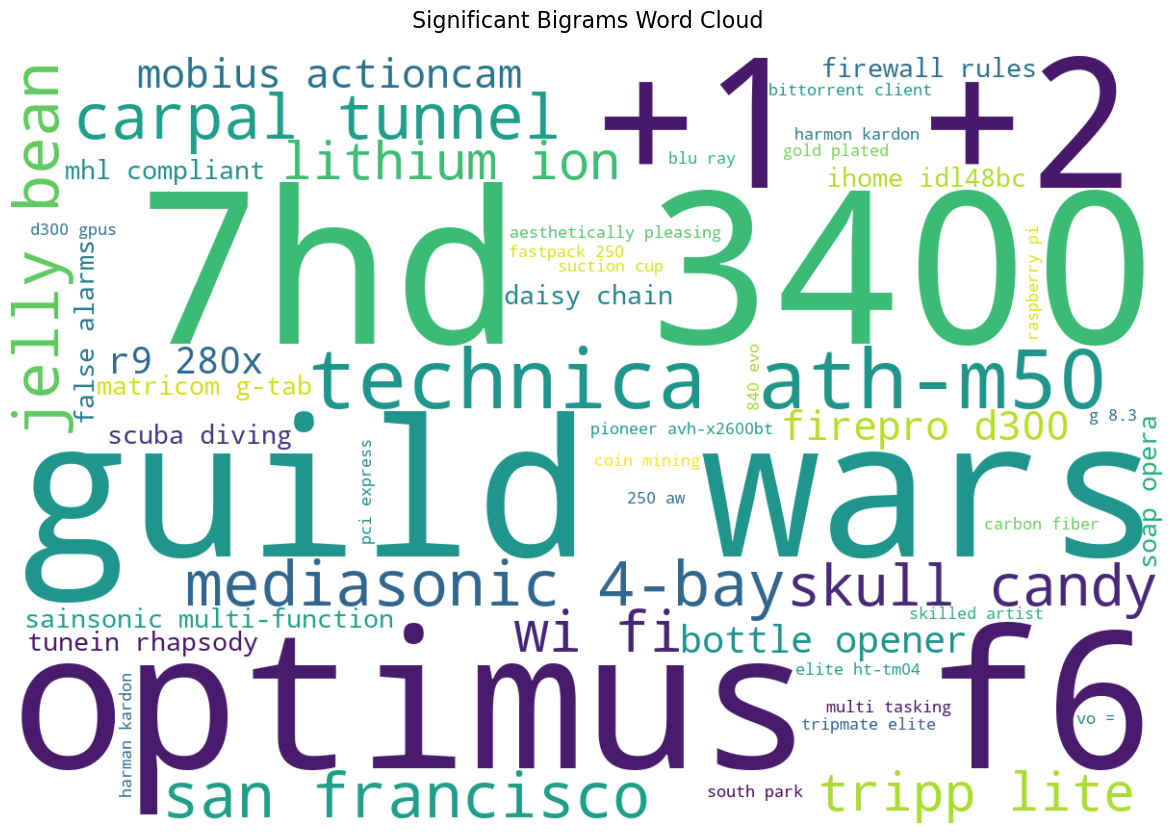

In [17]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.tokenize import word_tokenize
import seaborn as sns

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

def simple_tokenize(text):
    """Simple tokenization function that splits on whitespace and punctuation"""
    if isinstance(text, str):
        # Split on whitespace and remove punctuation
        words = text.lower().split()
        return [word.strip('.,!?()[]{}:;"\'-') for word in words]
    return []

def calculate_word_significance(df, column='review_text', class_column='sentiment', 
                              class_value='positive', min_freq=5):
    """
    Calculate word significance scores using chi-square test
    """
    # Create two text corpora
    positive_text = ' '.join(df[df[class_column] == class_value][column].fillna(''))
    negative_text = ' '.join(df[df[class_column] != class_value][column].fillna(''))
    
    # Count frequencies using simple tokenization
    pos_words = Counter(simple_tokenize(positive_text))
    neg_words = Counter(simple_tokenize(negative_text))
    
    # Get stopwords to filter
    stop_words = set(stopwords.words('english'))
    
    # Calculate significance scores
    word_scores = {}
    for word in set(list(pos_words.keys()) + list(neg_words.keys())):
        # Skip stopwords and very short words
        if word in stop_words or len(word) < 3:
            continue
            
        pos_freq = pos_words.get(word, 0)
        neg_freq = neg_words.get(word, 0)
        
        if pos_freq + neg_freq >= min_freq:
            # Calculate chi-square score
            total = sum(pos_words.values()) + sum(neg_words.values())
            expected_pos = (pos_freq + neg_freq) * sum(pos_words.values()) / total
            expected_neg = (pos_freq + neg_freq) * sum(neg_words.values()) / total
            
            chi_square = ((pos_freq - expected_pos) ** 2 / expected_pos if expected_pos > 0 else 0) + \
                        ((neg_freq - expected_neg) ** 2 / expected_neg if expected_neg > 0 else 0)
            
            # Determine direction (positive or negative association)
            direction = 1 if pos_freq/sum(pos_words.values()) > neg_freq/sum(neg_words.values()) else -1
            word_scores[word] = chi_square * direction
    
    return word_scores

def create_comparative_wordcloud(df, word_scores, title="Comparative Word Cloud"):
    """
    Create a word cloud where color indicates positive/negative association
    and size indicates significance
    """
    # Create color function
    def color_func(word, font_size, position, orientation, font_path, random_state):
        score = word_scores.get(word, 0)
        if score > 0:
            return "rgb(0, 100, 0)"  # Dark green for positive
        else:
            return "rgb(139, 0, 0)"  # Dark red for negative
    
    # Create word cloud
    wordcloud = WordCloud(
        width=1200,
        height=800,
        background_color='white',
        max_words=100,
        color_func=color_func
    )
    
    # Generate from frequencies
    frequencies = {word: abs(score) for word, score in word_scores.items()}
    wordcloud.generate_from_frequencies(frequencies)
    
    # Plot
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, pad=20)
    plt.show()

def analyze_word_patterns(input_file):
    """
    Perform advanced word cloud analysis
    """
    # Read data
    df = pd.read_csv(input_file)
    
    # 1. Calculate word significance scores
    word_scores = calculate_word_significance(df)
    
    # 2. Create comparative word cloud
    create_comparative_wordcloud(df, word_scores, "Sentiment-Based Word Cloud")
    
    # 3. Analyze bigram patterns
    text = ' '.join(df['review_text'].fillna(''))
    tokens = simple_tokenize(text)
    
    # Create bigram finder
    finder = BigramCollocationFinder.from_words(tokens)
    
    # Apply frequency filter to remove rare bigrams
    finder.apply_freq_filter(3)
    
    # Score bigrams using PMI
    bigram_measures = BigramAssocMeasures()
    scored_bigrams = finder.score_ngrams(bigram_measures.pmi)
    
    # Create bigram word cloud
    bigram_frequencies = {' '.join(bigram): score for bigram, score in scored_bigrams[:100]}
    
    bigram_cloud = WordCloud(
        width=1200,
        height=800,
        background_color='white',
        max_words=50
    ).generate_from_frequencies(bigram_frequencies)
    
    plt.figure(figsize=(15, 10))
    plt.imshow(bigram_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Significant Bigrams Word Cloud", fontsize=16, pad=20)
    plt.show()

# Run the analysis
input_file = "../data/processed/final_sentiment_analysis_data.csv"
analyze_word_patterns(input_file)

In [ ]:
'''
Sentiment-Based Word Cloud Analysis:

Green Words (Positive Associations):

"good" - standard positive descriptor
"well" - indicates satisfaction with product performance
"easy" - suggests user-friendly products
"excellent" - strong positive sentiment

Red Words (Negative Associations):

"quickbooks" appearing prominently in red suggests frequent complaints/issues with this software
"broke/broken" - indicates reliability issues
"terrible" - strong negative sentiment
"bad" - direct negative feedback
"waste" - suggests dissatisfaction with value/time
"s6800" and "700" appearing in red might indicate specific problematic product models
"return" - suggests product dissatisfaction leading to returns


Significant Bigrams Word Cloud:

Product Categories and Technical Terms:

"carpal tunnel" - likely related to ergonomic concerns/products
"lithium ion" - battery technology discussions
"7hd", "3400", "ath-m50" - specific product model numbers
"guild wars" - gaming related discussions
"optimus" - likely referring to LG Optimus products
"firewall rules" - security-related discussions
"mediasonic" - brand/product mentions
"san francisco" - location-based context

Key Insights:

Quality Issues:

There's a significant focus on product reliability problems (broke, waste, terrible)
QuickBooks appears to have notable user dissatisfaction


Technical Products:

Reviews cover a wide range of technical products (audio equipment, batteries, security products)
Specific model numbers are frequently discussed, suggesting detailed technical reviews


Usage Patterns:

Ergonomic concerns appear important (carpal tunnel mentions)
Gaming and entertainment products have significant presence
Professional software (QuickBooks) generates substantial discussion


Customer Behavior:

"Return" prominence suggests active customer response to dissatisfaction
Technical specifications are important to reviewers (model numbers, technical terms)
'''

In [16]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.tokenize import word_tokenize
import seaborn as sns

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

def simple_tokenize(text):
    """Simple tokenization function that splits on whitespace and punctuation"""
    if isinstance(text, str):
        # Split on whitespace and remove punctuation
        words = text.lower().split()
        return [word.strip('.,!?()[]{}:;"\'-') for word in words]
    return []

def calculate_word_significance(df, column='reviewText', class_column='sentiment', 
                              class_value='positive', min_freq=5):
    """
    Calculate word significance scores using chi-square test
    """
    # Create two text corpora
    positive_text = ' '.join(df[df[class_column] == class_value][column].fillna(''))
    negative_text = ' '.join(df[df[class_column] != class_value][column].fillna(''))
    
    # Count frequencies using simple tokenization
    pos_words = Counter(simple_tokenize(positive_text))
    neg_words = Counter(simple_tokenize(negative_text))
    
    # Get stopwords to filter
    stop_words = set(stopwords.words('english'))
    
    # Calculate significance scores
    word_scores = {}
    for word in set(list(pos_words.keys()) + list(neg_words.keys())):
        # Skip stopwords and very short words
        if word in stop_words or len(word) < 3:
            continue
            
        pos_freq = pos_words.get(word, 0)
        neg_freq = neg_words.get(word, 0)
        
        if pos_freq + neg_freq >= min_freq:
            # Calculate chi-square score
            total = sum(pos_words.values()) + sum(neg_words.values())
            expected_pos = (pos_freq + neg_freq) * sum(pos_words.values()) / total
            expected_neg = (pos_freq + neg_freq) * sum(neg_words.values()) / total
            
            chi_square = ((pos_freq - expected_pos) ** 2 / expected_pos if expected_pos > 0 else 0) + \
                        ((neg_freq - expected_neg) ** 2 / expected_neg if expected_neg > 0 else 0)
            
            # Determine direction (positive or negative association)
            direction = 1 if pos_freq/sum(pos_words.values()) > neg_freq/sum(neg_words.values()) else -1
            word_scores[word] = chi_square * direction
    
    return word_scores

def create_comparative_wordcloud(df, word_scores, title="Comparative Word Cloud"):
    """
    Create a word cloud where color indicates positive/negative association
    and size indicates significance
    """
    # Create color function
    def color_func(word, font_size, position, orientation, font_path, random_state):
        score = word_scores.get(word, 0)
        if score > 0:
            return "rgb(0, 100, 0)"  # Dark green for positive
        else:
            return "rgb(139, 0, 0)"  # Dark red for negative
    
    # Create word cloud
    wordcloud = WordCloud(
        width=1200,
        height=800,
        background_color='white',
        max_words=100,
        color_func=color_func
    )
    
    # Generate from frequencies
    frequencies = {word: abs(score) for word, score in word_scores.items()}
    wordcloud.generate_from_frequencies(frequencies)
    
    # Plot
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, pad=20)
    plt.show()

def analyze_word_patterns(input_file):
    """
    Perform advanced word cloud analysis
    """
    # Read data
    df = pd.read_csv(input_file)
    
    # 1. Calculate word significance scores
    word_scores = calculate_word_significance(df)
    
    # 2. Create comparative word cloud
    create_comparative_wordcloud(df, word_scores, "Sentiment-Based Word Cloud")
    
    # 3. Analyze bigram patterns
    text = ' '.join(df['reviewText'].fillna(''))
    tokens = simple_tokenize(text)
    
    # Create bigram finder
    finder = BigramCollocationFinder.from_words(tokens)
    
    # Apply frequency filter to remove rare bigrams
    finder.apply_freq_filter(3)
    
    # Score bigrams using PMI
    bigram_measures = BigramAssocMeasures()
    scored_bigrams = finder.score_ngrams(bigram_measures.pmi)
    
    # Create bigram word cloud
    bigram_frequencies = {' '.join(bigram): score for bigram, score in scored_bigrams[:100]}
    
    bigram_cloud = WordCloud(
        width=1200,
        height=800,
        background_color='white',
        max_words=50
    ).generate_from_frequencies(bigram_frequencies)
    
    plt.figure(figsize=(15, 10))
    plt.imshow(bigram_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Significant Bigrams Word Cloud", fontsize=16, pad=20)
    plt.show()

# Run the analysis
input_file = "../data/processed/cleaned_sentiment_analysis_reviews.csv"
analyze_word_patterns(input_file)

[nltk_data] Downloading package punkt to /Users/yizu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/yizu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/yizu/nltk_data'
    - '/opt/anaconda3/envs/sa_env/nltk_data'
    - '/opt/anaconda3/envs/sa_env/share/nltk_data'
    - '/opt/anaconda3/envs/sa_env/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:


def preprocess_text(text):
    """Tokenize and preprocess text by splitting and removing punctuation."""
    if isinstance(text, str):
        return [word.strip(string.punctuation).lower() for word in text.split() if word.isalpha()]
    return []


def analyze_keywords(input_file):
    # Read the dataset
    df = pd.read_csv(input_file)

    # Ensure the 'processed_text' column exists
    if 'processed_text' not in df.columns:
        raise ValueError(
            "The dataset must include a 'processed_text' column with raw text.")

    # Preprocess the 'processed_text' column to tokenize it into lists
    df['processed_text'] = df['processed_text'].apply(preprocess_text)

    # Separate the data by sentiment
    positive_reviews = df[df['sentiment'] == 'positive']['processed_text']
    negative_reviews = df[df['sentiment'] == 'negative']['processed_text']

    # Flatten the tokenized reviews into a single list of words
    positive_words = [word for review in positive_reviews for word in review]
    negative_words = [word for review in negative_reviews for word in review]

    # Count word frequencies
    positive_word_counts = Counter(positive_words)
    negative_word_counts = Counter(negative_words)

    # Get the top 10 most frequent words
    top_positive_keywords = positive_word_counts.most_common(10)
    top_negative_keywords = negative_word_counts.most_common(10)

    # Display the results
    print("\nTop 10 Positive Keywords:")
    print(pd.DataFrame(top_positive_keywords,
          columns=["Keyword", "Frequency"]))

    print("\nTop 10 Negative Keywords:")
    print(pd.DataFrame(top_negative_keywords,
          columns=["Keyword", "Frequency"]))


if __name__ == "__main__":
    # Replace with your file path
    input_file = "../data/processed/cleaned_sentiment_analysis_reviews.csv"
    analyze_keywords(input_file)


Top 10 Positive Keywords:
  Keyword  Frequency
0     not       2742
1      so       1987
2    very       1803
3   great       1759
4     one       1645
5     use       1609
6     can       1595
7    like       1500
8     all       1458
9    good       1397

Top 10 Negative Keywords:
  Keyword  Frequency
0     not        412
1     one        175
2      so        168
3      no        142
4     get        129
5    very        127
6    when        126
7    will        120
8   would        117
9     use        112


In [ ]:
import pandas as pd
from collections import Counter
from itertools import tee

def tokenize_simple(text):
    """Tokenize text by splitting on spaces."""
    if isinstance(text, str):
        return [word.lower().strip() for word in text.split() if word.isalpha()]
    return []


def generate_bigrams(tokens):
    """Generate bigrams from a list of tokens."""
    a, b = tee(tokens)
    next(b, None)
    return list(zip(a, b))


def analyze_not_usage(input_file):
    # Read the dataset
    df = pd.read_csv(input_file)

    # Ensure the 'processed_text' column exists
    if 'processed_text' not in df.columns:
        raise ValueError(
            "The dataset must include a 'processed_text' column with raw text.")

    # Preprocess the 'processed_text' column to tokenize it into lists
    df['processed_text'] = df['processed_text'].apply(tokenize_simple)

    # Filter positive reviews containing "not"
    positive_reviews = df[df['sentiment'] == 'positive']['processed_text']
    positive_reviews_with_not = positive_reviews[positive_reviews.apply(
        lambda review: 'not' in review)]

    # Extract bigrams for reviews containing "not"
    bigram_counts = Counter()
    for review in positive_reviews_with_not:
        bigrams = generate_bigrams(review)  # Generate bigrams
        bigram_counts.update(bigrams)

    # Filter bigrams where "not" is the first word
    not_bigrams = {bigram: count for bigram,
                   count in bigram_counts.items() if bigram[0] == 'not'}

    # Sort and get the top 10 most common "not" bigrams
    sorted_not_bigrams = sorted(
        not_bigrams.items(), key=lambda x: x[1], reverse=True)[:10]

    # Convert to DataFrame for better visualization
    not_bigrams_df = pd.DataFrame(
        sorted_not_bigrams, columns=["Bigram", "Frequency"])

    # Display results
    print("\nTop 10 'Not' Bigrams in Positive Reviews:")
    print(not_bigrams_df)


# Run the analysis
# Replace with your file path
input_file = "../data/processed/cleaned_sentiment_analysis_reviews.csv"
analyze_not_usage(input_file)


Top 10 'Not' Bigrams in Positive Reviews:
        Bigram  Frequency
0  (not, sure)         74
1  (not, work)         51
2   (not, too)         43
3  (not, only)         41
4   (not, bad)         40
5   (not, use)         36
6  (not, like)         35
7  (not, much)         32
8   (not, big)         31
9  (not, good)         28


In [3]:
import pandas as pd


def extract_phrases_with_bigram(input_file, bigram_to_search):
    # Read the dataset
    df = pd.read_csv(input_file)

    # Ensure the 'processed_text' column exists
    if 'processed_text' not in df.columns:
        raise ValueError(
            "The dataset must include a 'processed_text' column with raw text.")

    # Ensure the raw review text column exists for context
    if 'reviewText' not in df.columns:
        raise ValueError(
            "The dataset must include a 'reviewText' column for full context.")

    # Tokenize the processed_text column
    df['processed_text'] = df['processed_text'].apply(
        lambda x: x.lower().split() if isinstance(x, str) else [])

    # Filter reviews that contain the bigram
    bigram_reviews = df[df['processed_text'].apply(
        lambda tokens: any(tokens[i:i+2] == list(bigram_to_search)
                           for i in range(len(tokens)-1))
    )]

    # Extract the context for each review
    contexts = []
    for _, row in bigram_reviews.iterrows():
        review_text = row['reviewText']
        if isinstance(review_text, str) and " ".join(bigram_to_search) in review_text.lower():
            contexts.append(review_text)

    # Display the sentences containing the bigram
    print(f"\nSentences containing the bigram '{' '.join(bigram_to_search)}':")
    for context in contexts[:10]:  # Limit to 10 examples for clarity
        print(f"- {context.strip()}")


if __name__ == "__main__":
    # Replace with your file path
    input_file = "../data/processed/cleaned_sentiment_analysis_reviews.csv"
    bigram_to_search = ("not", "bad")  # Specify the bigram to search
    extract_phrases_with_bigram(input_file, bigram_to_search)


Sentences containing the bigram 'not bad':
- Got this unit real fast and came in a box wrapped in plastic wrap lol. But hey was all there and not damaged. Easy to assemble and looks and feels great, I had a couple minor issues with this thing you can view on the youtube page if you like to see it. But overall not bad!  http://youtu.be/4RoQHzo-C9k?list=UUZlPl1F9XVcDu12wZ7L1pJw
- I have used many headphones before, so I have a very good idea of what headphones need to sound like.Plantronics is a great headphones:Sound quality is great the bass is very good for a small Bluetooth headphones.Fit factor: The headphones fits very nicely and snugly I do very intensive workouts with it.Battery life: is not the best but it is amazing comparing to the size of the headphones. (The charging case is a great edition to make sure your headphones are charged while in your bag)Connectivity: it is easy to connect and pair with your phone, I love the ability to pair to 8 devices.After all:It is a very go